In [1]:
# importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('hongos2.csv')   
df.head(n=5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Nombre de columnas

print('Cantidad de filas y columnas:', df.shape)
print('Nombre de columnas:', df.columns)

Cantidad de filas y columnas: (8124, 23)
Nombre de columnas: Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [4]:
print(df.head(5))

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

COLUMNAS, NULOS Y TIPO DE DATOS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()
'''
count = Numero de Valores nulos
unique = Numero de valores unicos
top = Valor mas frecuente
freq = Freceuncia del valor mas frecuente
'''

'\ncount = Numero de Valores nulos\nunique = Numero de valores unicos\ntop = Valor mas frecuente\nfreq = Freceuncia del valor mas frecuente\n'

Calcular el numero de nulos de cada feature

In [7]:
# Calculamos nulos por columna

nulos = df.isnull().sum()

# Mostramos los resultados
print(nulos)
df.replace('?', np.nan, inplace=True) # Reemplaza '?' por NaN

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [8]:
# Creamos un nuevo dataframe con dos columnas: 'features' y 'n_values'

valores_unicos = pd.DataFrame({
    'features': df.columns,                               # Nombres de Columnas
    'n_values': [df[col].unique() for col in df.columns]  # Valores unicos de cada columna
})

# Mostramos el nuevo dataframe

print (valores_unicos)

                    features                              n_values
0                      class                                [p, e]
1                  cap-shape                    [x, b, s, f, k, c]
2                cap-surface                          [s, y, f, g]
3                  cap-color        [n, y, w, g, e, p, b, u, c, r]
4                    bruises                                [t, f]
5                       odor           [p, a, l, n, f, c, y, s, m]
6            gill-attachment                                [f, a]
7               gill-spacing                                [c, w]
8                  gill-size                                [n, b]
9                 gill-color  [k, n, g, p, w, h, u, e, b, r, y, o]
10               stalk-shape                                [e, t]
11                stalk-root                     [e, c, b, r, nan]
12  stalk-surface-above-ring                          [s, f, k, y]
13  stalk-surface-below-ring                          [s, f, y

TRATAR VALORES QUE ENTENDAMOS QUE SON NULOS

Imputar valores nulos con la moda o eliminar las filas

In [9]:
# Eliminar columna entera

df.drop('stalk-root', axis=1, inplace=True)

In [10]:
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')


CLASE PREDICTORA

In [11]:
target = 'class'
labels = df[target]


features = df.drop(target, axis=1)  # Eliminamos clase predictora del dataset

TRANSFORMACION DE FEATURES

Usamos la tecnica ONE HOT ENCODING - Para convertir columnas categoricas en columnas binarias.
Usando pd.get_dummies
Una vez codificados los datos, puedes calcular la correlacion.

In [12]:
print('columnas antes de transformar:')
print(features.columns)

columnas antes de transformar:
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')


In [13]:
featurs = pd.get_dummies(features)
print(featurs.head())

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...          True         False  

In [16]:
# Dividir datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featurs, labels, test_size=0.33, random_state=42)

PCA

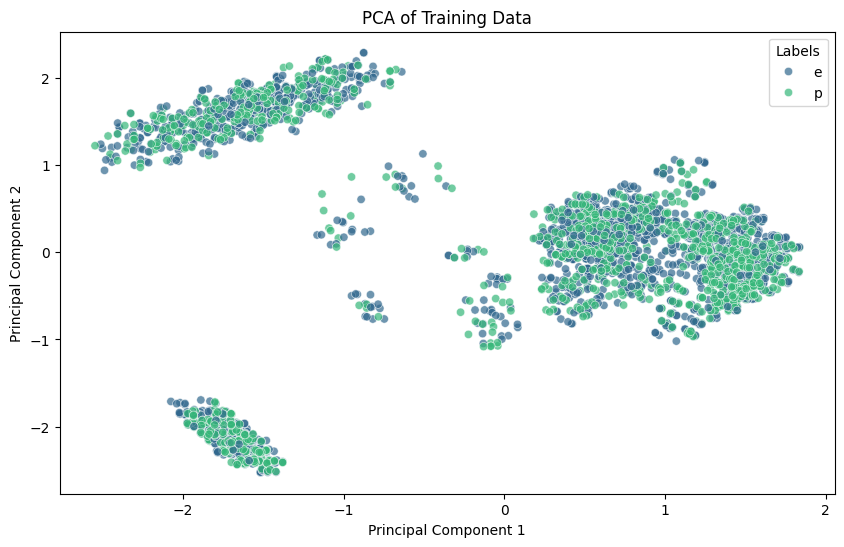

In [17]:
# Inicializar PCA para reducir a 2 dimensiones

pca = PCA(n_components=2)  # Queremos reducir a 2 dimensiones
pca.fit(X_train)  # Ajustar PCA a los datos de entrenamiento

X_train_pca = pca.transform(X_train)  # Transformar los datos de entrenamiento




# Crear un DataFrame con las componentes principales y las etiquetas
df_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])  # PC1 y PC2 son las componentes principales
df_pca['label'] = y_train  # Añadir las etiquetas



plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='viridis', alpha=0.7)
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.show()


MODELO DE ENTRENAMIENTO

In [18]:

# 1. Definir el clasificador y el número de estimadores
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar en train
rf_classifier.fit(X_train_pca, y_train)

# 3. Calcular la precisión sobre test
# Primero, necesitamos transformar X_test usando PCA
X_test_pca = pca.transform(X_test)

# Ahora podemos hacer predicciones y calcular la precisión
y_pred = rf_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo Random Forest: {accuracy:.4f}")

Precisión del modelo Random Forest: 0.9243


In [19]:
# Vamos a ver qué tamaño tenemos de dataset

X_train.shape

(5443, 112)

REDUCIMOS LAS FEATURES USANDO PCA

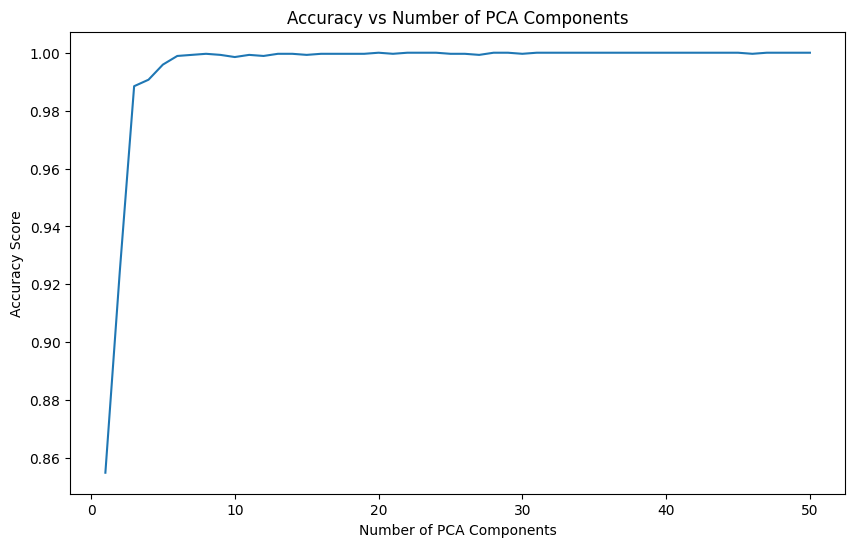

El número óptimo de componentes PCA es: 20
La precisión máxima alcanzada es: 1.0000


In [20]:
# Definir un rango de valores a probar
n_features = range(1, min(X_train.shape[1], 50) + 1)  # Probamos de 1 hasta el mínimo entre 50 y el número total de características
scores = []

for n in n_features:
    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n_components=n)
    # 2. Aprender PCA sobre X_train y transformar X_train y X_test
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Entrenar Random Forest
    # 1. Definir el RF
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # 2. Entrenar clasificador
    rf_classifier.fit(X_train_pca, y_train)

    # Calcular y guardar el score
    y_pred = rf_classifier.predict(X_test_pca)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(n_features), y=scores)
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy Score')
plt.show()

# Encontrar el número óptimo de componentes
optimal_components = n_features[np.argmax(scores)]
print(f"El número óptimo de componentes PCA es: {optimal_components}")
print(f"La precisión máxima alcanzada es: {max(scores):.4f}")

CLUSTERING

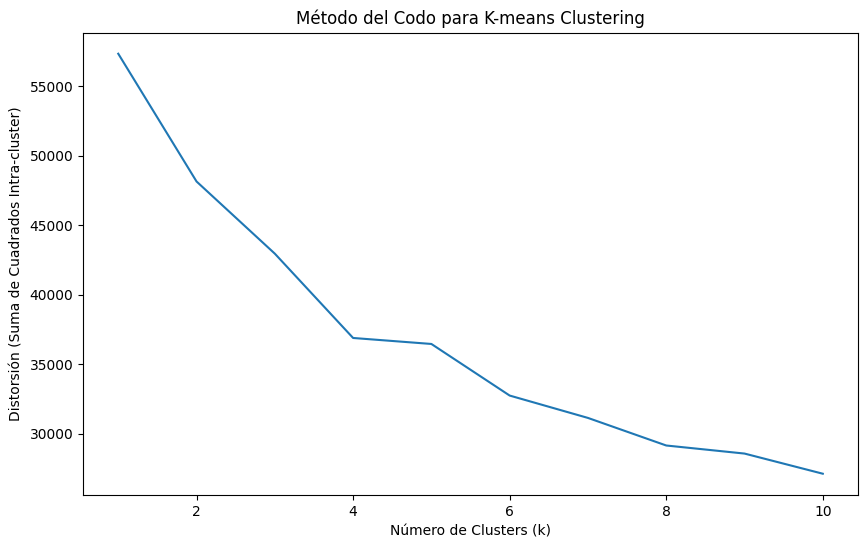

El punto de codo sugerido es k = 2


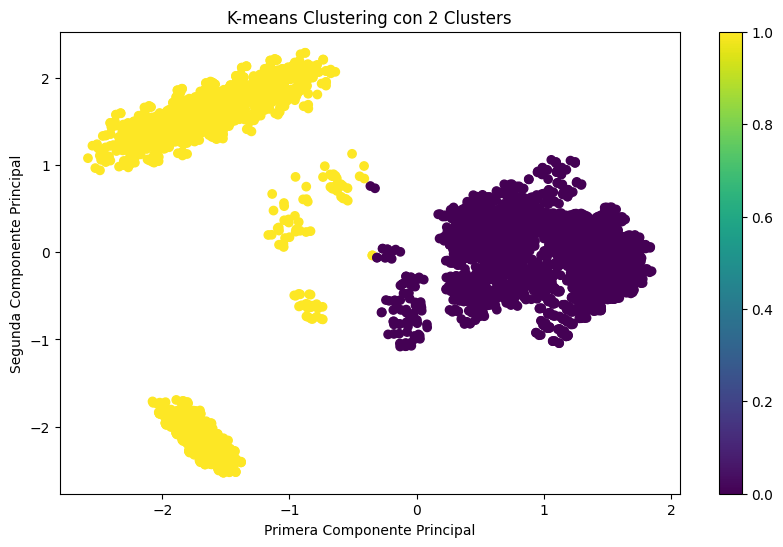

In [21]:
# Definir un rango de valores para k
k_values = range(1, 11)  # Probamos de 1 a 10 clusters

# Lista para almacenar las distorsiones (suma de cuadrados intra-cluster)
distortions = []

# Iterar sobre los valores de k
for k in k_values:
    # Definir KMeans y ajustar
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    
    # Calcular la distorsión (suma de cuadrados intra-cluster)
    distortion = kmeans.inertia_
    distortions.append(distortion)

# Visualizar los resultados (método del codo)
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_values), y=distortions)
plt.title('Método del Codo para K-means Clustering')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorsión (Suma de Cuadrados Intra-cluster)')
plt.show()

# Encontrar el "codo" de la curva (puedes ajustar esto manualmente después de ver la gráfica)
differences = np.diff(distortions)
elbow_point = np.argmin(differences) + 1
print(f"El punto de codo sugerido es k = {elbow_point + 1}")

# Aplicar K-means con el número óptimo de clusters
optimal_k = elbow_point + 1
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(X_train_pca)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'K-means Clustering con {optimal_k} Clusters')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(scatter)
plt.show()

HACER UN CATPLOT

<Figure size 1500x1000 with 0 Axes>

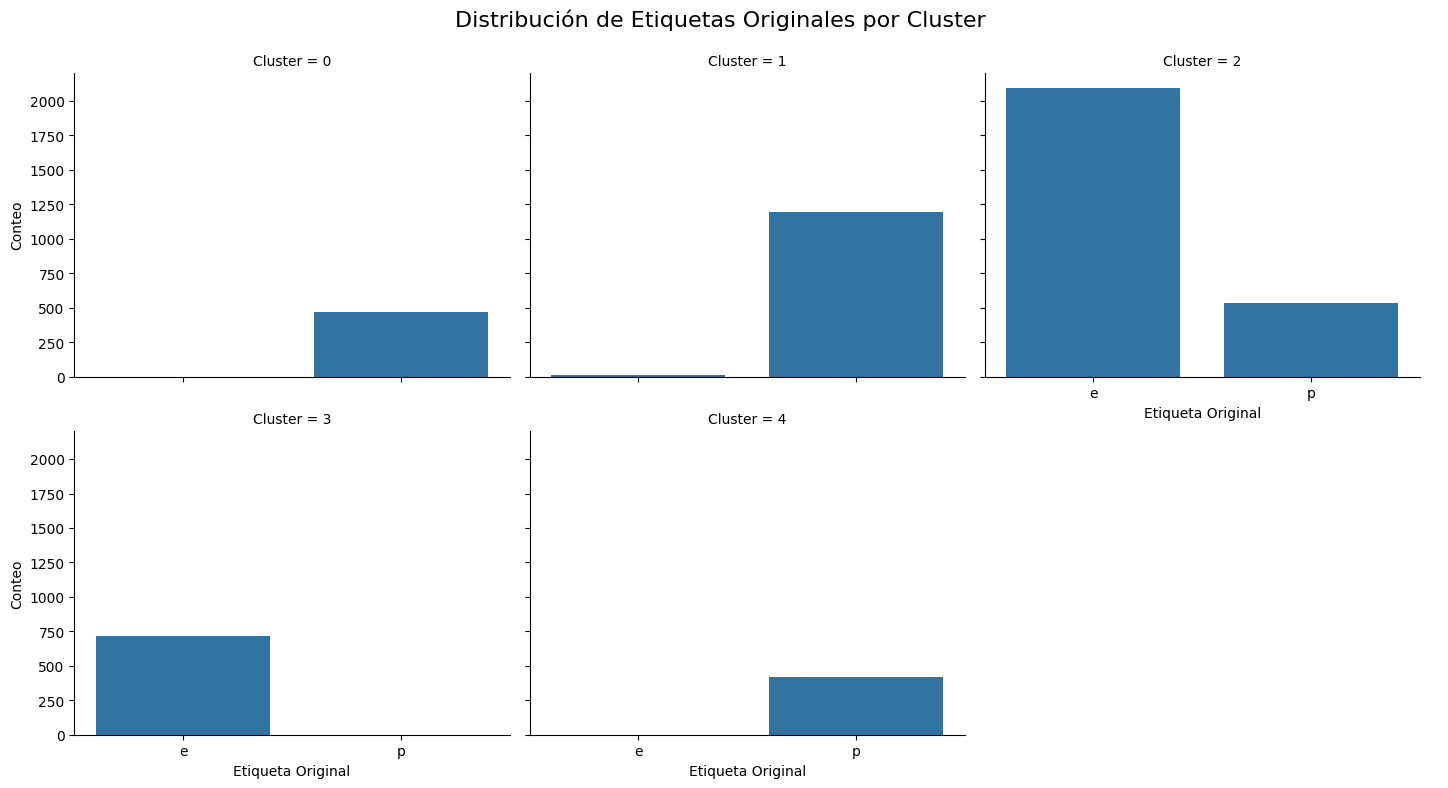

In [24]:
# Aprender Kmeans con el valor de K obtenido
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

# Crear un DataFrame con las etiquetas originales y los clusters asignados
df_cluster = pd.DataFrame({
    'Original_Label': y_train,
    'Cluster': cluster_labels
})

# Convertir las etiquetas a categóricas si no lo son ya
df_cluster['Original_Label'] = pd.Categorical(df_cluster['Original_Label'])
df_cluster['Cluster'] = pd.Categorical(df_cluster['Cluster'])

# Pintar el catplot
plt.figure(figsize=(15, 10))
ax = sns.catplot(
    col='Cluster',
    x='Original_Label',
    data=df_cluster,
    kind='count',
    col_wrap=3,  # Ajusta este valor dependiendo de cuántos clusters tengas
    height=4,
    aspect=1.2
)

# Ajustar el título y las etiquetas
ax.fig.suptitle('Distribución de Etiquetas Originales por Cluster', fontsize=16)
ax.set_axis_labels('Etiqueta Original', 'Conteo')
ax.fig.subplots_adjust(top=0.9)  # Ajustar para que el título no se superponga

plt.show()

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

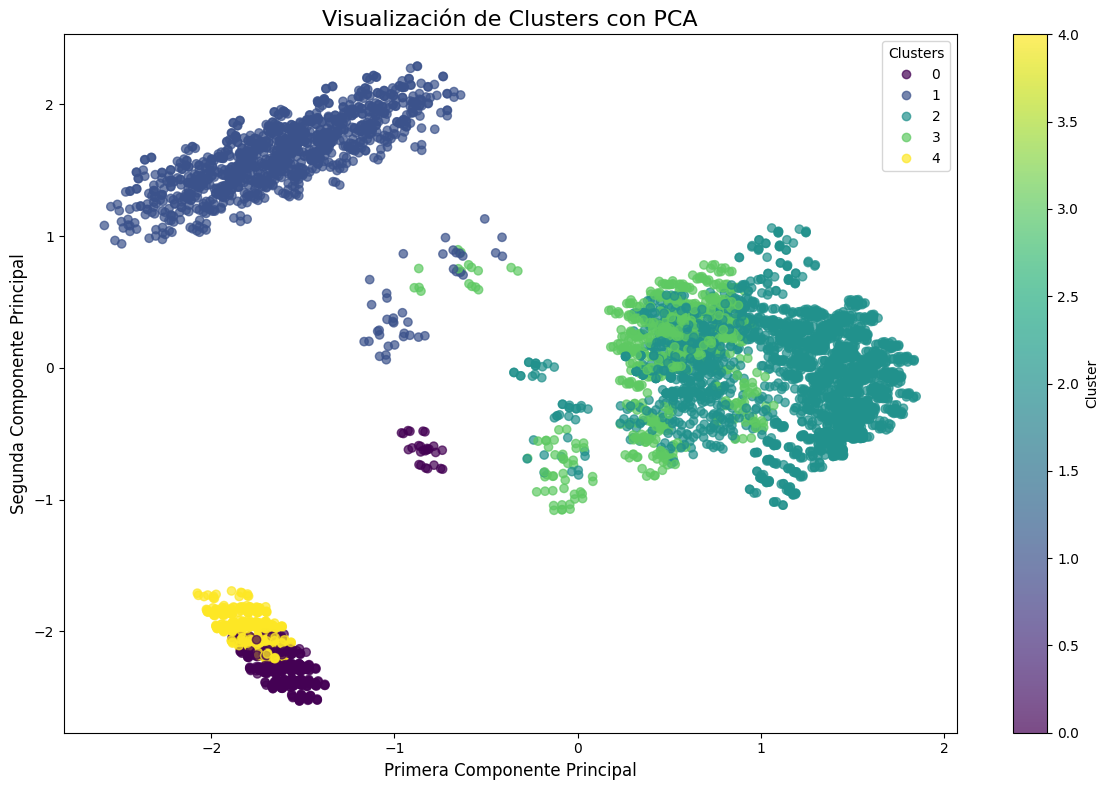

In [25]:
# 1. Entrenar PCA para representar (si no lo hemos hecho ya)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# 2. Crear el scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)

# Añadir título y etiquetas
plt.title('Visualización de Clusters con PCA', fontsize=16)
plt.xlabel('Primera Componente Principal', fontsize=12)
plt.ylabel('Segunda Componente Principal', fontsize=12)

# Añadir una barra de color
plt.colorbar(scatter, label='Cluster')

# Añadir una leyenda
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title="Clusters", loc="best")

plt.tight_layout()
plt.show()